# Feature extraction

# Step1
import dependencies

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Step2
load the payloads into memory

In [3]:
payloads = pd.read_csv("data/payloads.csv",index_col='index')
display(payloads.head(30))

,payload,is_malicious,injection_type
index,,,
0,abellot*ada,0.0,LEGAL
1,1280x800,0.0,LEGAL
2,Juergen,0.0,LEGAL
3,ambitious,0.0,LEGAL
4,Shalne,0.0,LEGAL
5,joann,0.0,LEGAL
6,tonnage,0.0,LEGAL
7,Kowtow,0.0,LEGAL
8,3683134199988856,0.0,LEGAL


# Step3
feature engineering

In [51]:
def plot_feature_distribution(features):
    print('Properties of feature: ' + features.name)
    print(features.describe())
    f, ax = plt.subplots(1, figsize=(10, 6))
    ax.hist(features, bins=features.max()-features.min()+1, normed=1)
    ax.set_xlabel('value')
    ax.set_ylabel('fraction')
    
    plt.show()

,payload,is_malicious,injection_type,example,length
index,,,,,
0,abellot*ada,0.0,LEGAL,1,11
1,1280x800,0.0,LEGAL,1,8
2,Juergen,0.0,LEGAL,1,7
3,ambitious,0.0,LEGAL,1,9
4,Shalne,0.0,LEGAL,1,6


Properties of feature: example
count    110381.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: example, dtype: float64


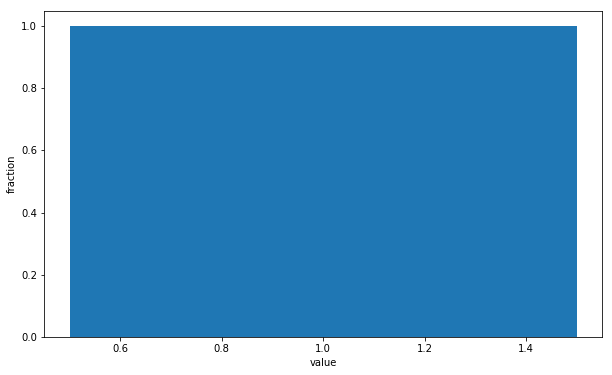

In [61]:
def create_feature_example(payloads):
    '''small description
    
    longer description
    '''
    
    payloads['example'] = [1 for row in payloads['payload']]
    return payloads

payloads = create_feature_example(payloads)
display(payloads.head())

plot_feature_distribution(payloads['example'])

,payload,is_malicious,injection_type,length,non-printable
index,,,,,
0,abellot*ada,0.0,LEGAL,11,0
1,1280x800,0.0,LEGAL,8,0
2,Juergen,0.0,LEGAL,7,0
3,ambitious,0.0,LEGAL,9,0
4,Shalne,0.0,LEGAL,6,0


Properties of feature: length
count    110381.000000
mean         16.647168
std          33.768929
min           1.000000
25%           6.000000
50%           9.000000
75%          14.000000
max        3024.000000
Name: length, dtype: float64


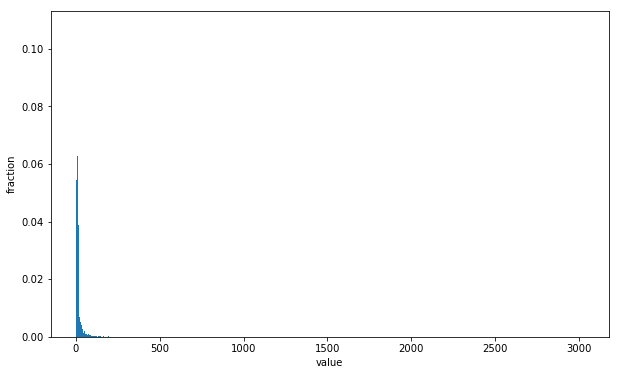

In [15]:
def create_feature_length(payloads):
    '''
        Feature describing the lengh of the input
    '''
    
    
    payloads['length'] = [len(str(row)) for row in payloads['payload']]
    return payloads


payloads = create_feature_length(payloads)
display(payloads.head())


plot_feature_distribution(payloads['length'])


,payload,is_malicious,injection_type,length,non-printable,punctuation
index,,,,,,
0,abellot*ada,0.0,LEGAL,11,0,1
1,1280x800,0.0,LEGAL,8,0,0
2,Juergen,0.0,LEGAL,7,0,0
3,ambitious,0.0,LEGAL,9,0,0
4,Shalne,0.0,LEGAL,6,0,0


Properties of feature: non-printable
count    110381.000000
mean          0.007411
std           0.216713
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          30.000000
Name: non-printable, dtype: float64


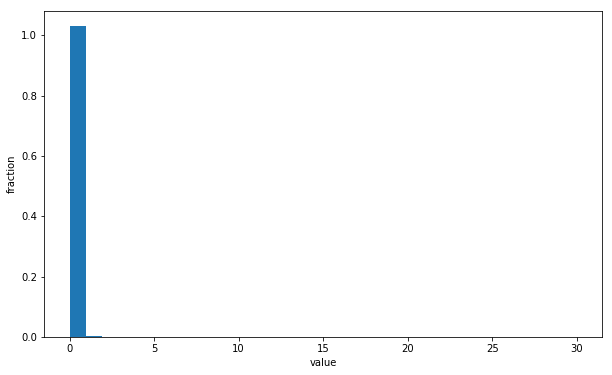

In [35]:
def create_feature_non_printable_characters(payloads):  
    '''
    Feature
    Number of non printable characthers within payload
    '''
    
    payloads['non-printable'] = [ len([1 for letter in str(row) if letter not in string.printable]) for row in payloads['payload']]
    return payloads
    

create_feature_non_printable_characters(payloads)
display(payloads.head())
    
plot_feature_distribution(payloads['non-printable'])


,payload,is_malicious,injection_type,length,non-printable,punctuation
index,,,,,,
0,abellot*ada,0.0,LEGAL,11,0,1
1,1280x800,0.0,LEGAL,8,0,0
2,Juergen,0.0,LEGAL,7,0,0
3,ambitious,0.0,LEGAL,9,0,0
4,Shalne,0.0,LEGAL,6,0,0


Properties of feature: punctuation
count    110381.000000
mean          2.438463
std          14.209566
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        3012.000000
Name: punctuation, dtype: float64


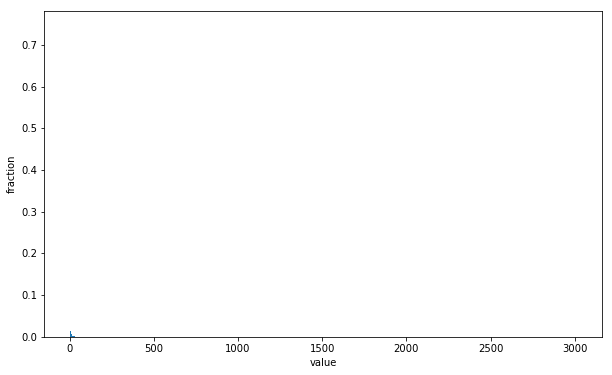

In [34]:
def create_feature_punctuation_characters(payloads):
    '''
    Feature
    Number of non printable characthers within payload
    '''
    
    payloads['punctuation'] = [ len([1 for letter in str(row) if letter in string.punctuation]) for row in payloads['payload']]
    return payloads
    

create_feature_non_printable_characters(payloads)
display(payloads.head())
    
plot_feature_distribution(payloads['punctuation'])

,payload,is_malicious,injection_type,length,non-printable,punctuation,min_byte,distinct_bytes,min-byte
index,,,,,,,,,
0,abellot*ada,0.0,LEGAL,11,0,1,42,8,42
1,1280x800,0.0,LEGAL,8,0,0,48,5,48
2,Juergen,0.0,LEGAL,7,0,0,74,6,74
3,ambitious,0.0,LEGAL,9,0,0,97,8,97
4,Shalne,0.0,LEGAL,6,0,0,83,6,83


Properties of feature: min-byte
count    110381.000000
mean         71.207980
std          26.557383
min           9.000000
25%          48.000000
50%          75.000000
75%          97.000000
max         125.000000
Name: min-byte, dtype: float64


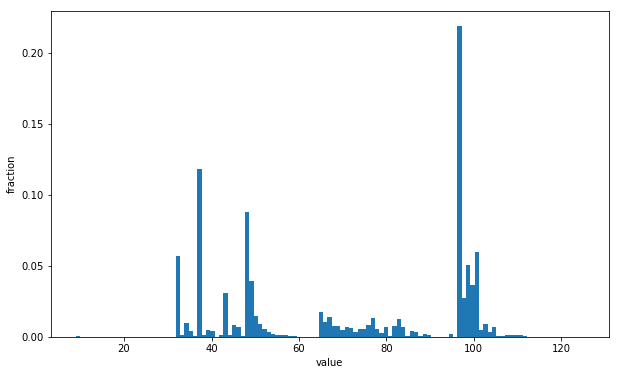

In [53]:
def create_feature_min_byte_value(payloads):
    '''
    Feature
    Minimum byte value in payload
    '''
    
    payloads['min-byte'] = [ min(bytearray(str(row), 'utf8')) for row in payloads['payload']]
    return payloads

create_feature_min_byte_value(payloads)
display(payloads.head())

plot_feature_distribution(payloads['min-byte'])

,payload,is_malicious,injection_type,length,non-printable,punctuation,min_byte,distinct_bytes,min-byte,max-byte
index,,,,,,,,,,
0,abellot*ada,0.0,LEGAL,11,0,1,42,8,42,116
1,1280x800,0.0,LEGAL,8,0,0,48,5,48,120
2,Juergen,0.0,LEGAL,7,0,0,74,6,74,117
3,ambitious,0.0,LEGAL,9,0,0,97,8,97,117
4,Shalne,0.0,LEGAL,6,0,0,83,6,83,110


Properties of feature: max-byte
count    110381.000000
mean        109.523731
std          20.280638
min          35.000000
25%         114.000000
50%         116.000000
75%         118.000000
max         240.000000
Name: max-byte, dtype: float64


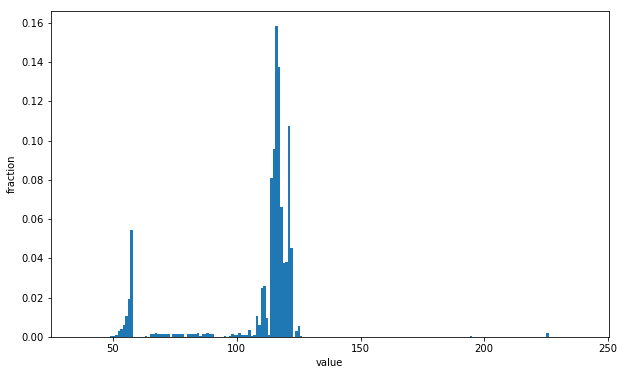

In [59]:
def create_feature_max_byte_value(payloads):
    '''
    Feature
    Maximum byte value in payload
    '''
    
    payloads['max-byte'] = [ max(bytearray(str(row), 'utf8')) for row in payloads['payload']]
    return payloads

create_feature_max_byte_value(payloads)
display(payloads.head())

plot_feature_distribution(payloads['max-byte'])

,payload,is_malicious,injection_type,length,non-printable,punctuation,min_byte,distinct_bytes,min-byte,max-byte,distinct-bytes
index,,,,,,,,,,,
0,abellot*ada,0.0,LEGAL,11,0,1,42,8,42,116,8
1,1280x800,0.0,LEGAL,8,0,0,48,5,48,120,5
2,Juergen,0.0,LEGAL,7,0,0,74,6,74,117,6
3,ambitious,0.0,LEGAL,9,0,0,97,8,97,117,8
4,Shalne,0.0,LEGAL,6,0,0,83,6,83,110,6


Properties of feature: distinct-bytes
count    110381.000000
mean          9.505612
std           7.453468
min           1.000000
25%           5.000000
50%           7.000000
75%          10.000000
max          77.000000
Name: distinct-bytes, dtype: float64


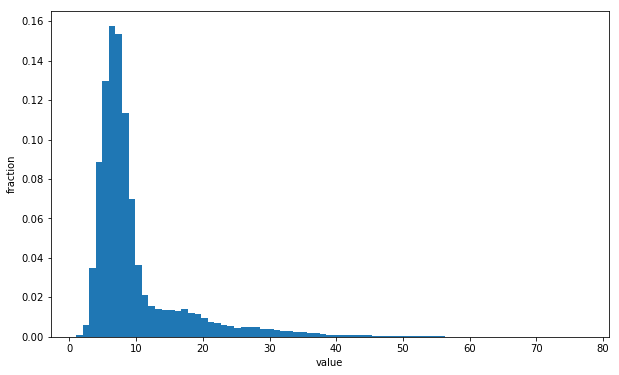

In [71]:
def create_feature_distinct_bytes(payloads):
    '''
    Feature
    Number of distinct bytes in payload
    '''
    
    payloads['distinct-bytes'] = [ len(list(set(bytearray(str(row), 'utf8')))) for row in payloads['payload']]
    return payloads

create_feature_distinct_bytes(payloads)
display(payloads.head())

plot_feature_distribution(payloads['distinct-bytes'])

,payload,is_malicious,injection_type,length,non-printable,punctuation,min_byte,distinct_bytes,min-byte,max-byte,distinct-bytes,sql-keywords
index,,,,,,,,,,,,
0,abellot*ada,0.0,LEGAL,11,0,1,42,8,42,116,8,0
1,1280x800,0.0,LEGAL,8,0,0,48,5,48,120,5,0
2,Juergen,0.0,LEGAL,7,0,0,74,6,74,117,6,0
3,ambitious,0.0,LEGAL,9,0,0,97,8,97,117,8,0
4,Shalne,0.0,LEGAL,6,0,0,83,6,83,110,6,0
5,joann,0.0,LEGAL,5,0,0,97,4,97,111,4,0
6,tonnage,0.0,LEGAL,7,0,0,97,6,97,116,6,0
7,Kowtow,0.0,LEGAL,6,0,0,75,4,75,119,4,0
8,3683134199988856,0.0,LEGAL,16,0,0,49,7,49,57,7,0


Properties of feature: sql-keywords
count    110381.000000
mean          0.000326
std           0.018057
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: sql-keywords, dtype: float64


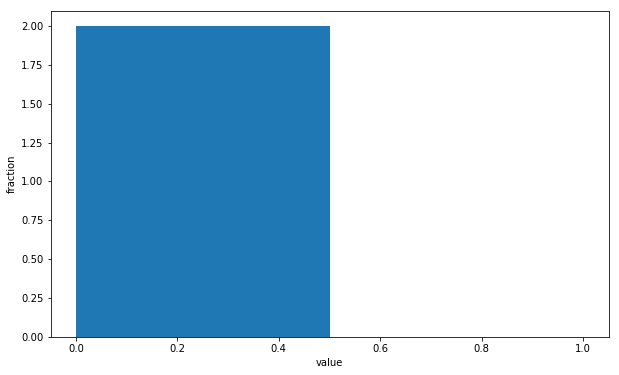

In [78]:
sql_keywords = pd.read_csv('data/SQLKeywords.txt', index_col=False)

def create_feature_sql_keywords(payloads):
    '''
    Feature
    Number of SQL keywords within payload
    '''
    
    #payloads['punctuation'] = [ len([1 for letter in str(row) if letter in sql_keywords]) for row in payloads['payload']]
    payloads['sql-keywords'] = [ len([1 for keyword in sql_keywords if keyword.lower() in str(row).lower()]) for row in payloads['payload']]
    return payloads
    

create_feature_sql_keywords(payloads)
display(payloads.head(100))
    
plot_feature_distribution(payloads['sql-keywords'])
    
    

# Step3 B
Feature engineering using bag of words techniques

In [89]:
def get3Grams(payload_obj):
    payload = str(payload_obj)
    ngrams = []
    for i in range(0,len(payload)-3):
        ngrams.append(payload[i:i+3])
    return ngrams

vectorizer = CountVectorizer(min_df=1, tokenizer=get3Grams)
X = vectorizer.fit_transform(payloads['payload'])
Y = payloads['is_malicious']

In [90]:
print(vectorizer.get_feature_names())

['\t\t2', '\t\tw', '\t"f', '\t"t', '\t%\t', '\t%f', "\t'a", '\t25', '\t6&', '\t6.', '\t<!', '\t<h', '\t<i', '\t<s', '\tas', '\tfo', '\tfu', '\tht', '\tp&', '\tp:', '\tpu', '\tri', '\tsy', '\twi', '\t}}', '\x0b=l', '\x0b[\\', '\x0bal', '\x0bon', '\x0c+~', '\x0con', '\x0e  ', '\x0e j', ' \x0e ', '   ', '  !', '  "', '  #', '  %', "  '", '  (', '  *', '  -', '  /', '  6', '  :', '  <', '  =', '  [', '  \\', '  a', '  c', '  d', '  e', '  f', '  h', '  i', '  j', '  m', '  n', '  o', '  p', '  r', '  s', '  t', '  v', '  x', '  }', ' !"', " !'", ' !-', ' !/', ' !=', ' !i', ' " ', ' ""', ' "%', ' "&', ' "\'', ' "(', ' "/', ' "1', ' "3', ' "4', ' "8', ' ";', ' "<', ' ">', ' "\\', ' "a', ' "c', ' "d', ' "e', ' "f', ' "h', ' "j', ' "l', ' "o', ' "p', ' "t', ' "x', ' "y', ' #"', ' #0', ' #3', ' #r', ' #x', ' #y', ' $[', ' $_', ' % ', ' %&', ' %0', ' %1', ' %2', ' %3', ' %6', ' %7', ' %>', ' %a', ' %b', ' %c', ' %d', ' %r', ' %s', ' %y', ' & ', ' &"', ' &#', ' &&', ' &a', ' &c', ' &g', ' &h', ' 

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
lgs = LogisticRegression()
lgs.fit(X_train, y_train)
display(lgs.score(X_test, y_test))

0.99592317448813195

In [92]:
x = vectorizer.transform(["<Scr <script> ipt> alert (1) </ scr <script> ipt>"])
print(lgs.predict(x))
x = vectorizer.transform(['&#x3C;holmi&#x26;den&#xE5;store&#x3E;'])
print(lgs.predict(x))

[ 1.]
[ 1.]


In [93]:
def grid_search_model(clf_factory, X, Y):
    cv = ShuffleSplit(n=len(X), n_iter=10, test_size=0.25, random_state=0)
    param_grid = dict(
    vect__min_df=[1, 10]
    )
    grid_search = GridSearchCV(
        clf_factory,
        param_grid=param_grid,
        cv=cv,
        scoring=make_scorer(f1_score),
        verbose=10
    )
    grid_search.fit(X, Y)
    return grid_search.best_estimator_, grid_search.best_score_

from sklearn.cross_validation import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

pipeline = Pipeline([('vect', vectorizer), ('clf', lgs)])
clf, score = grid_search_model(pipeline,payloads['payload'],Y)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
[CV] vect__min_df=1 ..................................................
[CV] ................... vect__min_df=1, score=0.979250, total=   4.5s
[CV] vect__min_df=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s remaining:    0.0s


[CV] ................... vect__min_df=1, score=0.975753, total=   4.3s
[CV] vect__min_df=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.5s remaining:    0.0s


[CV] ................... vect__min_df=1, score=0.979238, total=   4.6s
[CV] vect__min_df=1 ..................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   17.4s remaining:    0.0s


[CV] ................... vect__min_df=1, score=0.975200, total=   4.1s
[CV] vect__min_df=1 ..................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   22.8s remaining:    0.0s


[CV] ................... vect__min_df=1, score=0.974142, total=   3.8s
[CV] vect__min_df=1 ..................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   28.0s remaining:    0.0s


[CV] ................... vect__min_df=1, score=0.977178, total=   4.4s
[CV] vect__min_df=1 ..................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   33.7s remaining:    0.0s


[CV] ................... vect__min_df=1, score=0.977856, total=   3.6s
[CV] vect__min_df=1 ..................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   38.7s remaining:    0.0s


[CV] ................... vect__min_df=1, score=0.976381, total=   4.3s
[CV] vect__min_df=1 ..................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   44.2s remaining:    0.0s


[CV] ................... vect__min_df=1, score=0.973350, total=   4.0s
[CV] vect__min_df=1 ..................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   49.6s remaining:    0.0s


[CV] ................... vect__min_df=1, score=0.979676, total=   4.2s
[CV] vect__min_df=10 .................................................
[CV] .................. vect__min_df=10, score=0.979284, total=   3.6s
[CV] vect__min_df=10 .................................................
[CV] .................. vect__min_df=10, score=0.974691, total=   3.5s
[CV] vect__min_df=10 .................................................
[CV] .................. vect__min_df=10, score=0.981291, total=   3.6s
[CV] vect__min_df=10 .................................................
[CV] .................. vect__min_df=10, score=0.973303, total=   3.6s
[CV] vect__min_df=10 .................................................
[CV] .................. vect__min_df=10, score=0.973271, total=   3.4s
[CV] vect__min_df=10 .................................................
[CV] .................. vect__min_df=10, score=0.976339, total=   3.4s
[CV] vect__min_df=10 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.8min finished


In [ ]:
display(clf)
display(score)